In [25]:
%matplotlib inline
import pandas as pd
import pylab
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

import random
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd
from sklearn.ensemble import RandomForestClassifier
import sklearn
import gatspy
from gatspy import datasets, periodic
import statistics
import gc

In [27]:
obs = pd.read_csv('C:/Users/Max/Downloads/data/training_set_augmented.csv')
meta = pd.read_csv('C:/Users/Max/Downloads/data/training_set_metadata_augmented.csv')

#total=obs.merge(meta,on='object_id')

In [28]:
def timeplot(id,num):
    
    for i in range(num):
        df=total[total['target']==id]
        sample=int(df.object_id.sample(n=1))
        df2=df[df['object_id']==sample]
        sns.lmplot(data=df2,x='mjd',y='flux',fit_reg=False,hue='passband')
        

In [30]:
    
df2=obs[['flux','passband','object_id']]
df3=pd.pivot_table(df2, index='object_id', columns=['passband'], aggfunc=max)
df3.columns = df3.columns.droplevel(0)
df3.columns = [str(col) + '_band_Max' for col in df3.columns]

df4=pd.pivot_table(df2, index='object_id', columns=['passband'], aggfunc=min)
df4.columns = df4.columns.droplevel(0)
df4.columns = [str(col) + '_band_Min' for col in df4.columns]

df5=pd.pivot_table(df2, index='object_id', columns=['passband'], aggfunc=np.median)
df5.columns = df5.columns.droplevel(0)
df5.columns = [str(col) + '_band_Median' for col in df5.columns]

df6=pd.pivot_table(df2, index='object_id', columns=['passband'], aggfunc=lambda x: sum(i>max(x)/3 for i in x))
df6.columns = df6.columns.droplevel(0)
df6.columns = [str(col) + '_band_High_Count' for col in df6.columns]

df7=pd.pivot_table(df2, index='object_id', columns=['passband'], aggfunc=lambda x: sum(i<min(x)/3 for i in x))
df7.columns = df7.columns.droplevel(0)
df7.columns = [str(col) + '_band_Low_Count' for col in df7.columns]

df2= obs[obs['detected']==1][['mjd','object_id']]
df8=pd.pivot_table(df2,index='object_id',aggfunc=[min,max])
df8.columns=['min','max']
df8['detection_length']=df8['max']-df8['min']
df8.drop(['max','min'],axis=1,inplace=True)
output=pd.concat([df3,df4,df5,df6,df7,df8],axis=1)
del([df3,df4,df5,df6,df7,df8])
gc.collect()

631

In [31]:
output['object_id']=output.index

In [32]:
final=output.merge(meta,on='object_id')


C:\Users\Max\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'object_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


In [33]:
def mag(x):
    if x>0:
        return -2.5*np.log(x)
    else:
        return 0
    

In [36]:
for i in range(6):
    final[str(i)+'_band_abs_mag']=final[str(i)+'_band_Max'].apply(mag)-final['distmod']

In [38]:
final.to_csv('C:/Users/Max/Downloads/data/train_final.csv',index=False)

C:\Users\Max\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


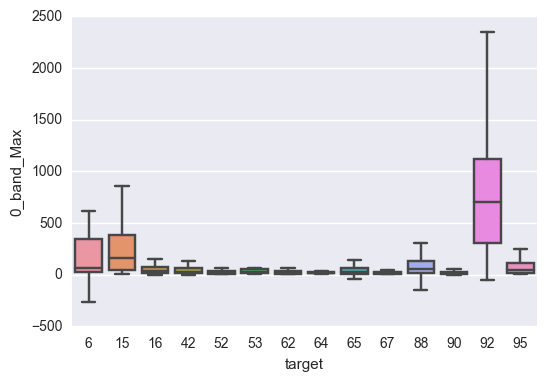

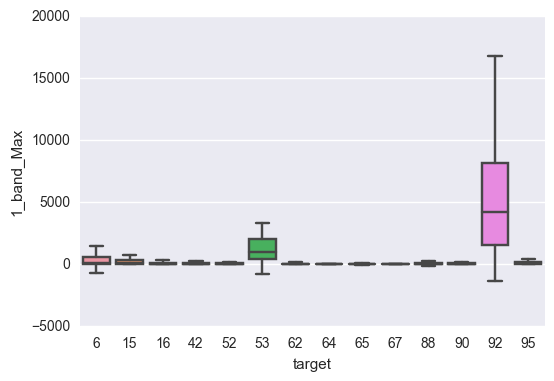

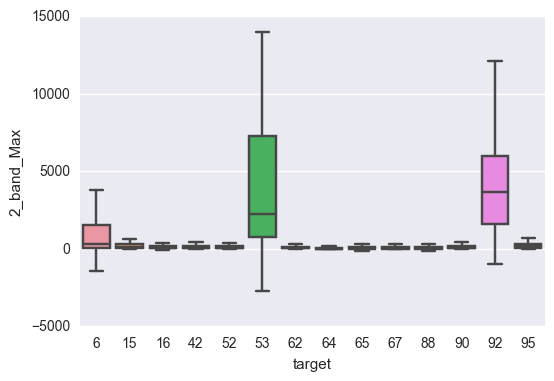

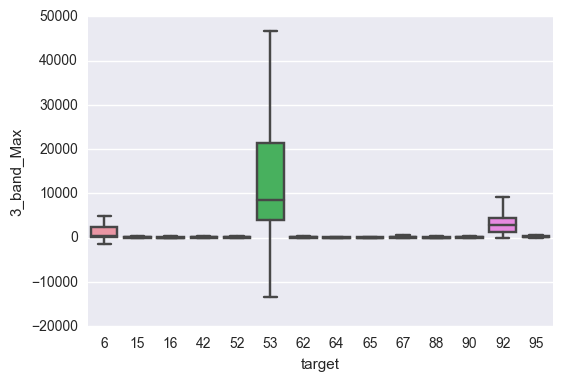

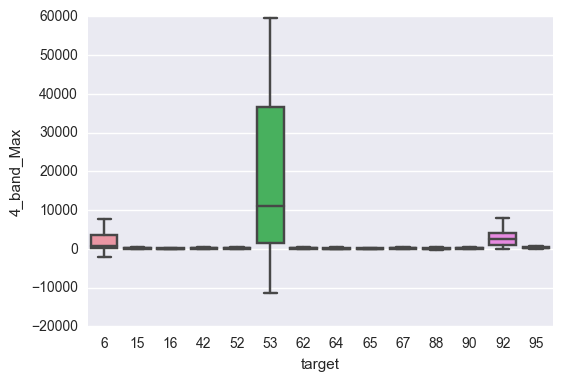

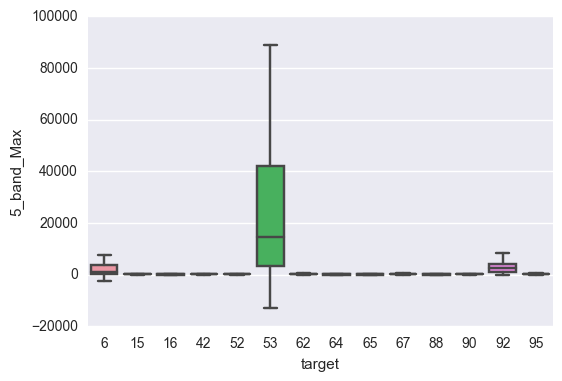

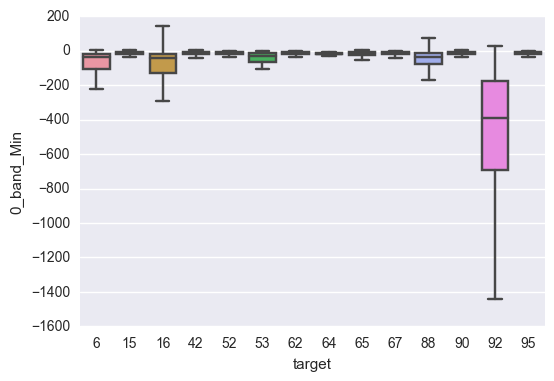

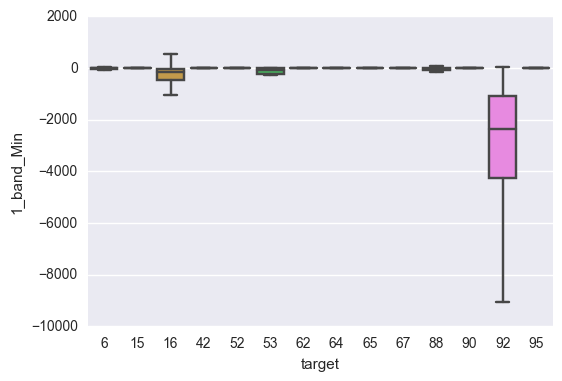

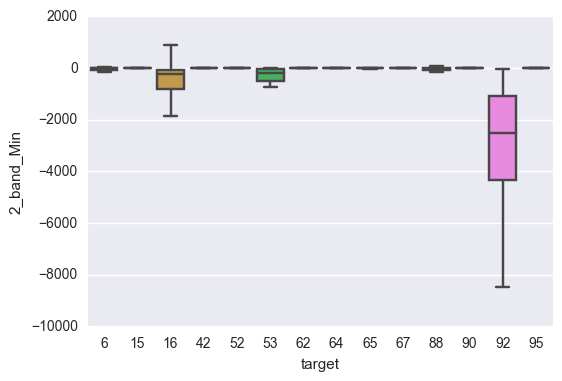

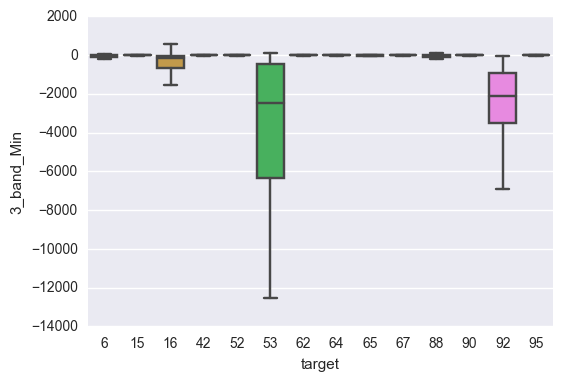

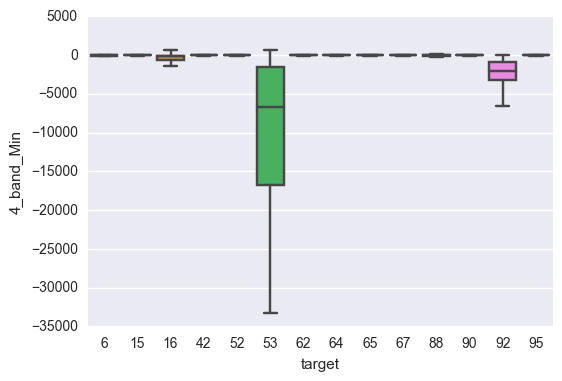

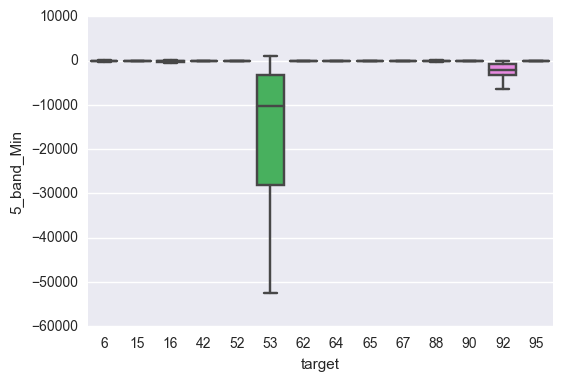

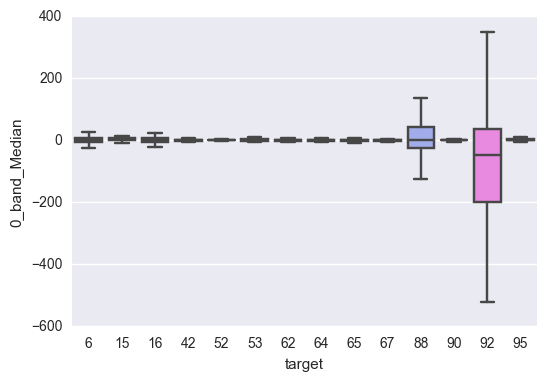

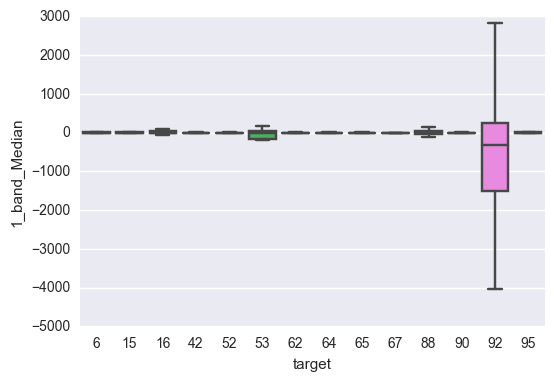

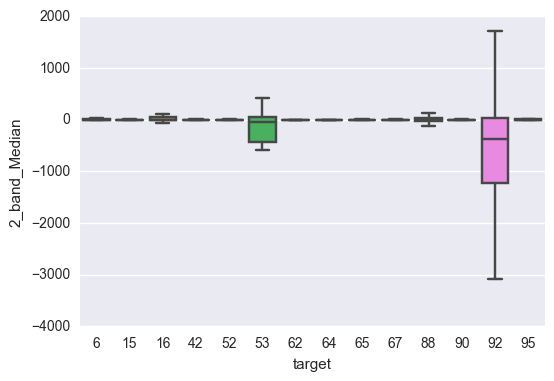

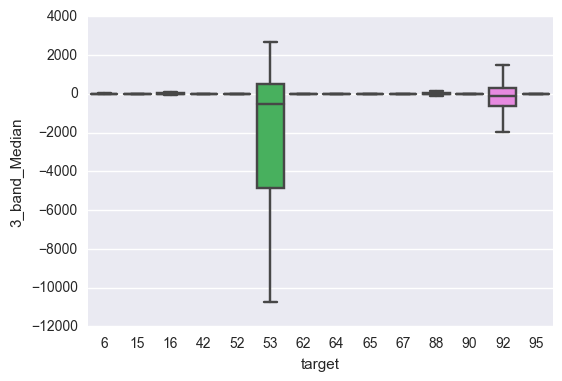

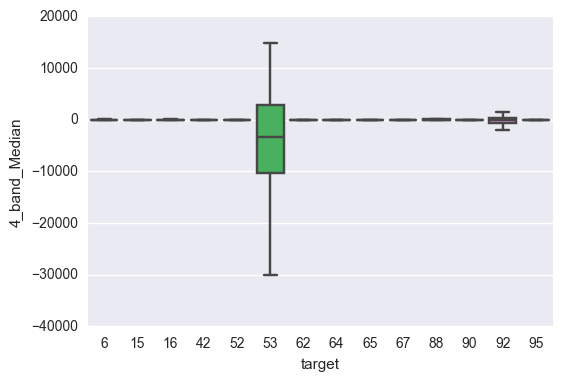

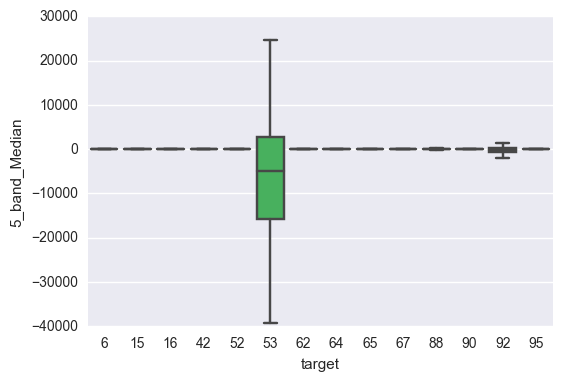

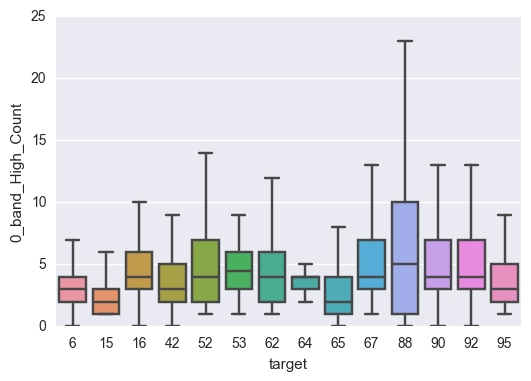

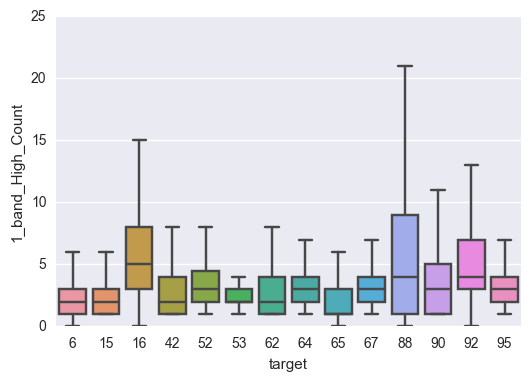

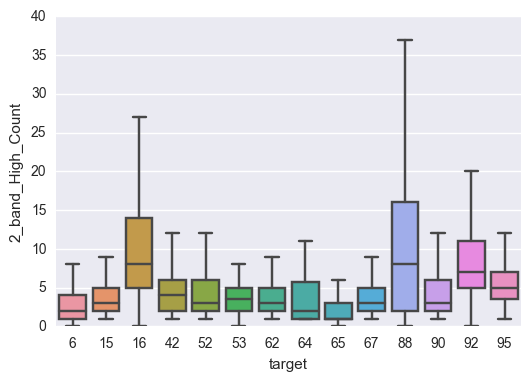

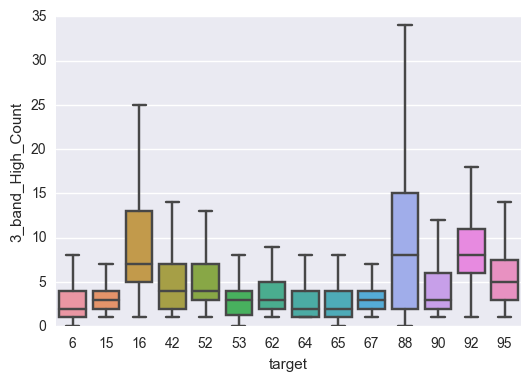

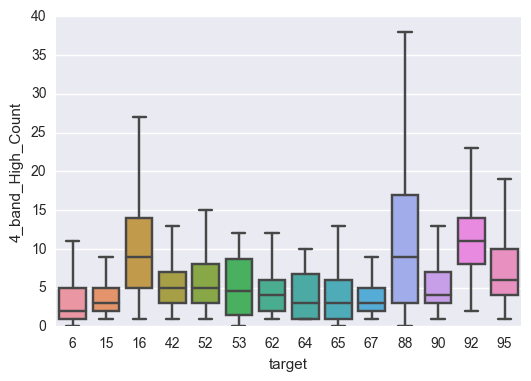

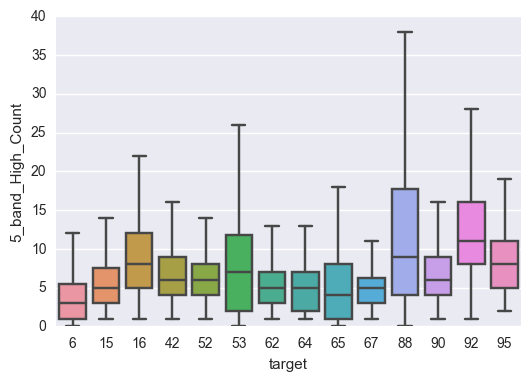

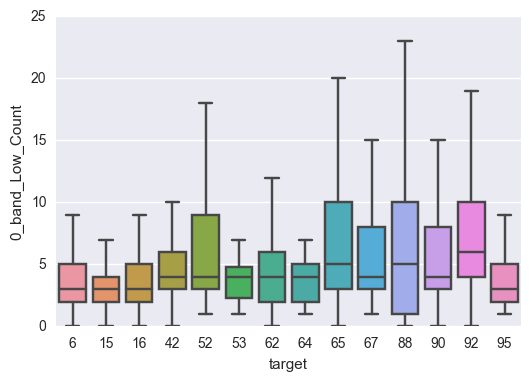

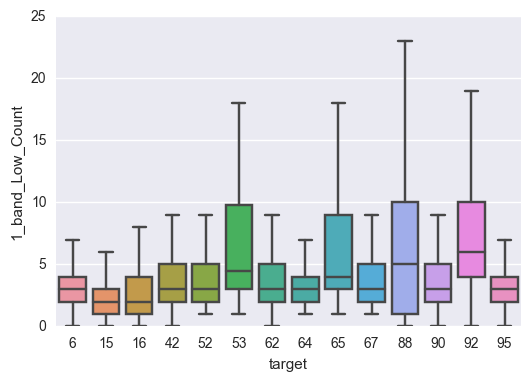

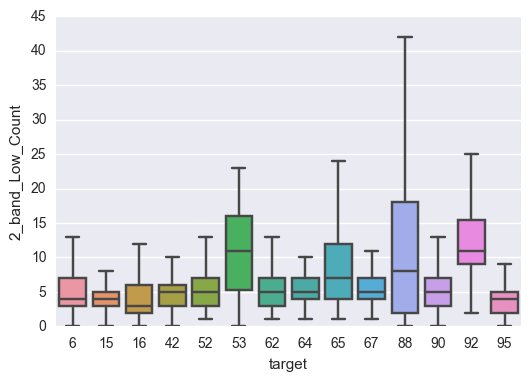

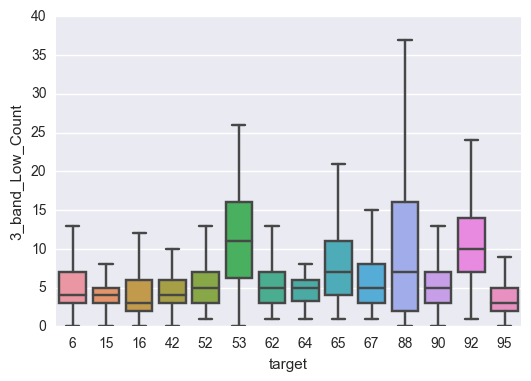

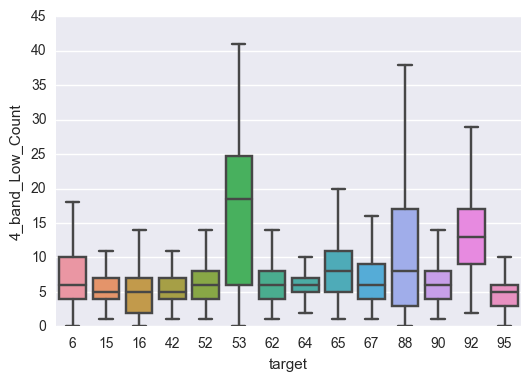

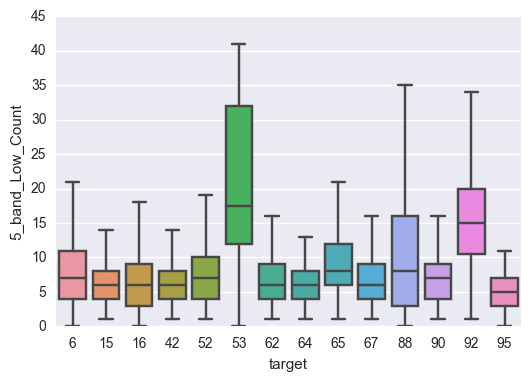

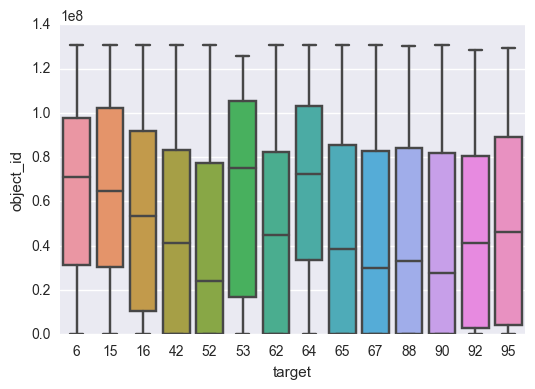

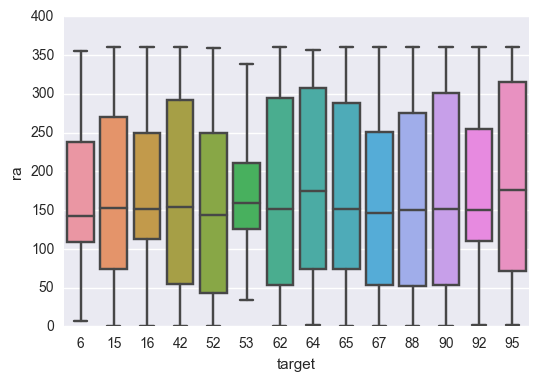

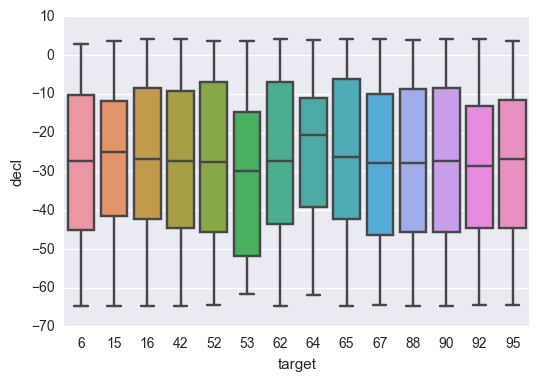

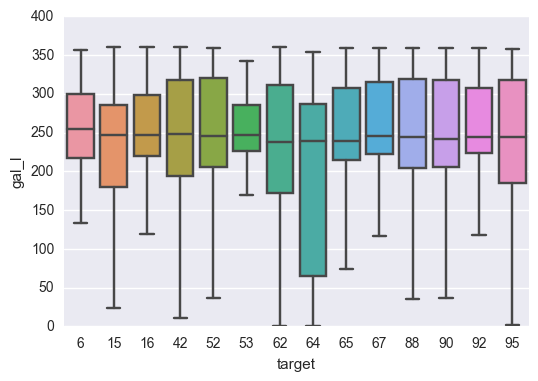

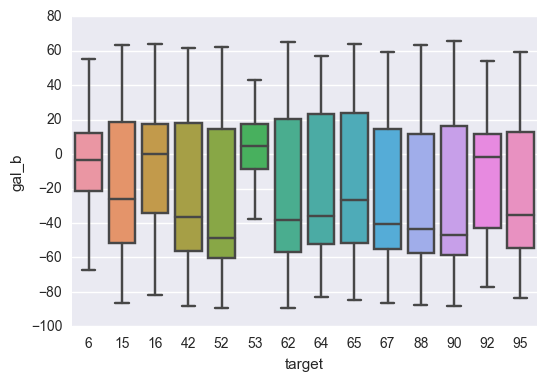

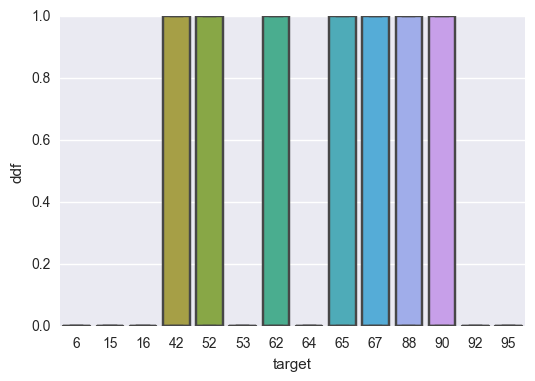

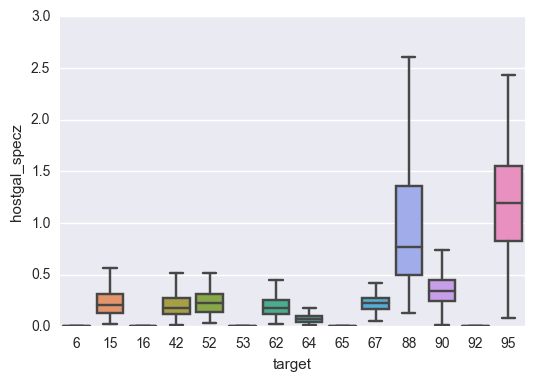

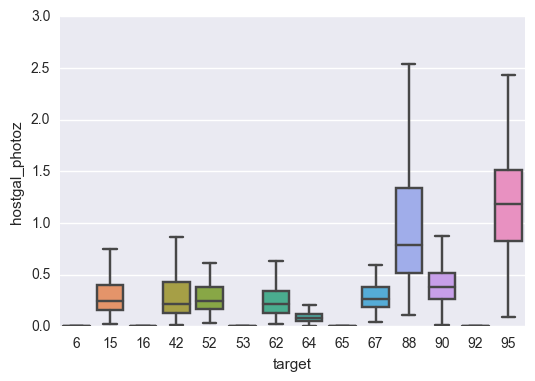

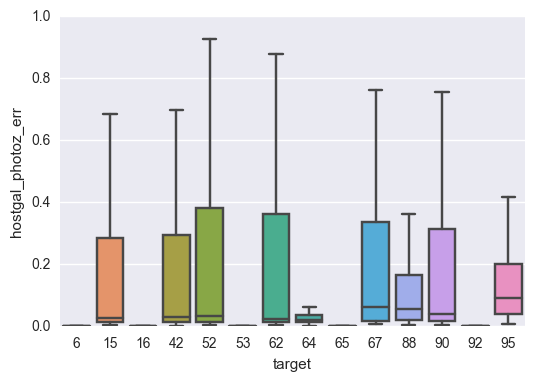

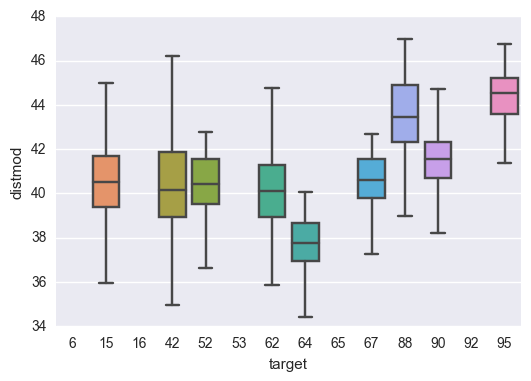

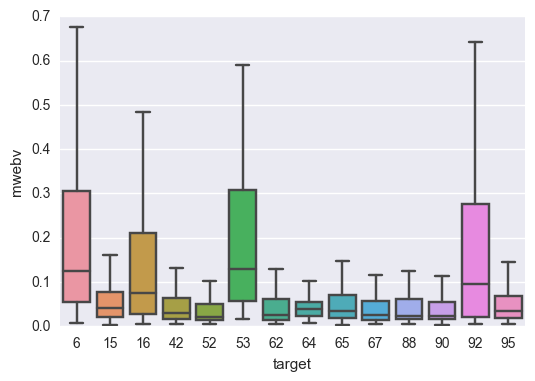

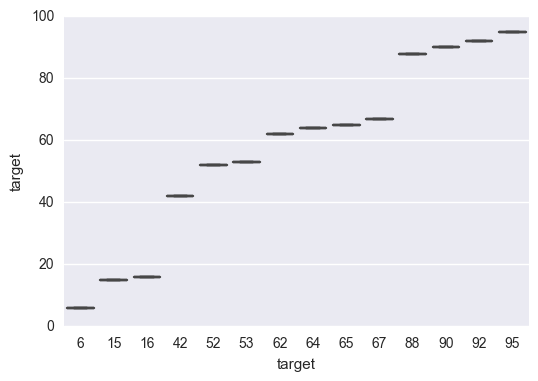

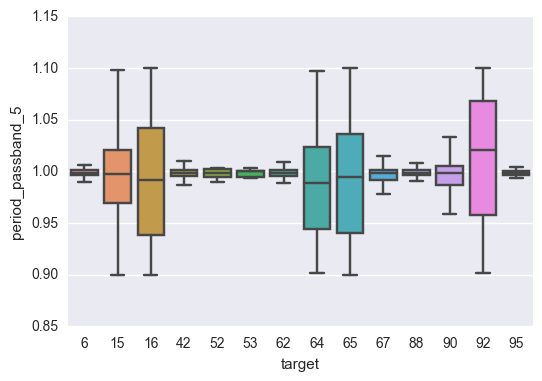

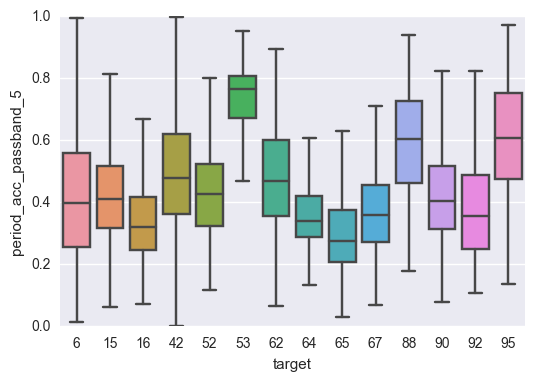

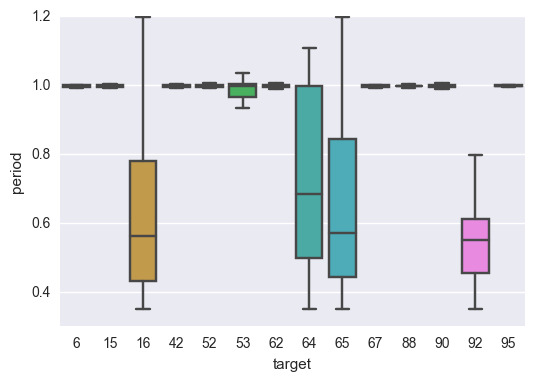

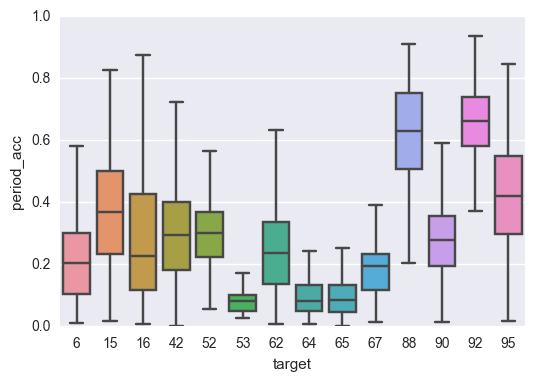

In [87]:
final2=final[(final.target!=53)&(final.target!=92)&(final.target!=6)&(final.target!=16)&(final.target!=88)]
for i, col in enumerate(final.columns):
    plt.figure(i)
    sns.boxplot(data=final,x='target',y=col,showfliers=False)